# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 4 K-Means Clustering ##

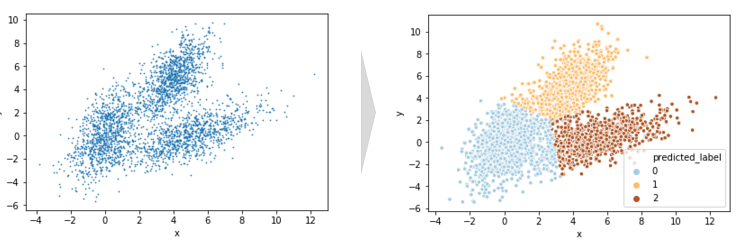

## Tasks

To let you understand K-mean clustering better, in this lab, we're going to implement K-mean clustering from scratch with the help of NumPy. In the second part, we will look into how different parameters might alter the output of the algorithms.

In [1]:
from sklearn import datasets

def isNotebook(): 
    # This function would return True if it's run inside a notebook or ipython environment. 
    # False if it's in normal Python interpreter. Otherwise, it'll raise an Error.
    # It is not necessary for you to understand this function.
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell' or shell == 'TerminalInteractiveShell' or shell == 'Shell':
            return True
        else:
            raise NotImplementedError
    except NameError:
        return False

def plot_diagram(X, y=None, k=None):
    if not isNotebook():
        return
    from itertools import cycle
    cycol = cycle('rgbcmk')  # Create a color cycle iteratable object
    if y is not None:        # y is the label of each individual points
        if k is None:        # k is number of cluster there is
            k = y.max() + 1  # The total number of clusters is the max label + 1, assuming the class labels are consecutive and start from 0
        for i, c in zip(range(k), cycol):
            plt.scatter(*X[y == i].T, c=c)  # Plot points of class with color c

def plot_points(points, marker='o'):
    if not isNotebook():
        return
    plt.scatter(*points, c='w', marker=marker) # Plot points with color white and specified shape
    pass

if isNotebook():
    secret_number = 42 # This will be the seed of the random number generator
else:
    import pickle
    with open('secret_number.pkl', 'rb') as f:
        secret_number = pickle.load(f) # Only matters during grading

X, y = datasets.make_blobs(10000, 2, centers=3, random_state=secret_number)  # Create a dataset with 3 blobs of cluster
plot_diagram(X, y)
if isNotebook():
    import matplotlib.pyplot as plt

NameError: name 'plt' is not defined

## Task 1.1: The Naive K-Means Algorithm

You need to fill in the blank space to implement the algorithm. In the `KCluster` class, there are two functions, `__init__` and `run`. `run` would run the actual algorithm (once) where `__init__` is to init the variables of the algorithm. I.e. the centroids.

To init the centroids, fill in blanks so that the program would:
   - Choose K random data points as the initial "centroids" (the mean of a cluster) of the dataset. 

The main algorithm (function `run`) of K-mean is as such (the same as in the review section):

   1. Find the distance between each data point to the centroids in the current iteration
   2. Assign each point to the closest centroid
   3. With the current cluster assignments, find all the center of the clusters and assign them to centroids
   4. Repeat 1 to 3 until the criterion to leave the loop is met

In [ ]:
class KCluster:
    def __init__(self, k, X, ndim=2):
        self.k = k
        self.ndim = ndim
        # Choose k data points from X as the initial centroids.
        self.centroid = X[np.random.randint(0, len(X), size=(k, ))]
    
    def run(self, X):
        # TODO: 1. Find the difference between each data point and centroid, assign the result to diff 
        # Hints: 
        #   - the shape of diff should be (self.k, X.shape[0], self.ndim). 
        #   - notice that X and centroid can't be subtract directly, what can we do if the shape mismatched?
        #   - what's the rules of it? In what condition the content of the dimension will be copied? How should the data be copied?
        diff =
        # TODO: 2. Calculate the Euclidean distance between each data point and centroid, assign the result to dist.
        # Hints: 
        #   - Euclidean distance = ((x2 - x1)**2 + (y_2 - y_1)**2) ** 0.5. (Option 1)
        #   - you can also check the documentation of numpy.linalg.norm. (Option 2)
        #       - In which axis should the norm be calculated?
        # TODO (optional): You can also calculate the distance between each data point and centroid directly without following the instruction above.
        dist =
        # TODO: 3. Assign the index of the closest centroid to each data point.
        # Hints: use numpy.argmin to find the index of the closest centroid for each data point. In which axis should we find the minimum?
        output =
        # TODO: 4. Update each centroid using the mean of each cluster.
        # Hints: 
        #  - we mentioned a method to choose specific elements from an array.
        #  - we mentioned that there were lots of function from NumPy for statistics. mean, std, median, etc. In what axis should we find the statistics?
        for i in range(self.k):
            self.centroid[i] =
        return output


## Task 1.2: Evaluation Metrics, Sum of Squared Errors

One of the more common ways to evaluate the quality of the clustering is using the Sum of Squared Errors (SSE) as a metric. It basically means summing the L2 distance (error) between each data point and the corresponding centroids for each cluster.

The formal definition of SSE is,

$$
    SSE = \sum_{j}^{M}\sum_{i}^{N_j}(x_i - c_j)^2
$$

where $M$ and $N_j$ represent the total numbers of clusters and elements inside the cluster $j$, respectively. $x_i$ is the i<sup>th</sup> element in cluster $j$ and $c_j$ is the centroid of cluster $j$.

Implement SSE by following the equation above.

In [ ]:
def SSE(X, y, k, centroids):
    sse = 0
    # TODO: For each cluster, calculate distance (square of difference, i.e. Euclidean/L2-distance) of samples to the datapoints and accumulate the sum to `sse`. (Hints: use numpy.sum and for loop)
    # Hints:
    #   - This is very similar to the step 4 of Task 1.1

    return sse

## Results

After you finished writing the functions, you should see three individual blobs of points and an SSE of 20087.304945947668

In [ ]:
import numpy as np
np.random.seed(secret_number) # Set seeds to expect the same result everytime
kmean = KCluster(3, X)
initial_points = kmean.centroid.copy()
for  n in range(100):
    output = kmean.run(X)
sse = SSE(X, output, 3, kmean.centroid)
print('SSE: ', round(sse, 5))

plot_diagram(X, output, 3)
plot_points(kmean.centroid.T, marker='+')
plot_points(initial_points.T, marker='o')

In the output above, the white circle dot represent the initial points, and the crosses represent the centroids after the program finished (after 100 iterations). As you can see, the program has successfully found the optimal points for this particular dataset. However, this leads to the discussion of the first limitation of K-means. The sensitivity of the choice of initial points.

In the next example, we're going to choose another set of random points (with altering the seeds). It turns out by altering the initial points. We can purposefully make the algorithm settle on a suboptimal solution.

In [ ]:
np.random.seed(2) # Set seeds to expect the same result everytime
kmean = KCluster(3, X)
initial_points = kmean.centroid.copy()
for  n in range(500):
    output = kmean.run(X)


plot_diagram(X, output, 3)
plot_points(kmean.centroid.T, marker='+')
plot_points(initial_points.T, marker='o')
SSE(X, output, 3, kmean.centroid)

# Limitation of K-means

The sensitivity of the initial centroids is a very well-known problem of the K-means algorithm. In fact, there are more advanced algorithms for choosing  better initial points (which we will not discuss here). But besides this, K-means still got a lot of different issues.

Although in our previous examples, the K-means algorithm had worked like a charm in clustering the dataset. However, in the real-world, plain K-means usually don't get us very far. 

In our examples, we purposefully made our dataset blob-like but not clusters with irregular shapes. That's because the blob-like structure is very apparent and obvious, so it's very easy to separate even in 2D (such as our examples). However, in the following example, K-means clustering would fail miserably. That's mostly due to the fact that this dataset isn't linearly separable. (Or at least not without some modifications to the input dimension, which is out of the scope of discussion of today). Therefore, K-means on its own is very limited. But it provides a grasp on why any people would want to use such an algorithm at all in the first place.

In [3]:
from sklearn import cluster
X, y = datasets.make_moons(10000, noise=0.05)
kmean = KCluster(2, X)
for  n in range(100):
    output = kmean.run(X)

plot_diagram(X, output, 2) # The two clusters are obviously not correctly separated.

NameError: name 'KCluster' is not defined